In [1]:
import pandas as pd
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
from datetime import datetime
import json
import numpy as np
import cnfundutils

pd.set_option('max_columns', 1000)
pd.set_option('max_row', 300)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

plt.rcParams['figure.figsize'] = (16.0, 8.0)

font_dirs = ["/usr/local/share/fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

hfont = matplotlib.font_manager.FontProperties(fname='/usr/local/share/fonts/SourceHanSans-Normal.ttc')
# matplotlib.rcParams['font.family'] = hfont.get_name()
plt.rcParams['font.family'] = hfont.get_name()

FUNDRESULTS_PATH = './calcfundfull.csv'
dfFundResults = cnfundutils.loadFundResult(FUNDRESULTS_PATH)

FUNDRESULTS2020_PATH = './calcfund2020.csv'
dfFundResults2020 = cnfundutils.loadFundResult(FUNDRESULTS2020_PATH)

FUNDS_PATH = './funds.xlsx'
dfFunds = cnfundutils.loadFundBasicInfo(FUNDS_PATH)

In [2]:
dfFundResults2020

,code,nums,totalReturn,maxDrawDown,sharpe,annualizedReturns,annualizedVolatility,variance,perValidData,durationYear,maxupday,permaxupday,maxdownday,permaxdownday,maxupweek,permaxupweek,maxdownweek,permaxdownweek,maxupmonth,permaxupmonth,maxdownmonth,permaxdownmonth,maxupyear,permaxupyear,maxdownyear,permaxdownyear,tags
0,000001,183,0.07338,0.04831,0.89850,0.10025,0.07818,0.00129,0.03917,12.80000,20200713,0.01004,20200203,-0.02144,20200706,0.02102,20200224,-0.02027,20200701,0.04059,20200302,-0.02848,20200102,-999999.00000,20200102,999999.00000,开放式;混合型 ;高风险
1,000003,183,0.09399,0.12211,0.45919,0.12840,0.21428,0.00495,0.09409,5.32877,20200706,0.05941,20200203,-0.06664,20200629,0.12907,20200713,-0.06176,20200701,0.12672,20200302,-0.05449,20200102,-999999.00000,20200102,999999.00000,开放式;债券型 ;低风险
2,000004,183,0.09099,0.12303,0.44019,0.12430,0.21423,0.00487,0.09409,5.32877,20200706,0.05946,20200203,-0.06664,20200629,0.13035,20200713,-0.06266,20200701,0.12597,20200302,-0.05359,20200102,-999999.00000,20200102,999999.00000,开放式;债券型 ;低风险
3,000005,183,0.01256,0.01933,-0.74103,0.01716,0.01732,0.00005,0.09351,5.36164,20200407,0.00647,20200605,-0.00225,20200420,0.00512,20200601,-0.00720,20200401,0.01600,20200601,-0.00720,20200102,-999999.00000,20200102,999999.00000,开放式;债券型 ;低风险
4,000006,183,0.47328,0.14627,2.20895,0.64656,0.27912,0.03911,0.41031,1.22192,20200204,0.04177,20200203,-0.08610,20200203,0.10265,20200224,-0.05718,20200701,0.15822,20200302,-0.09850,20200102,-999999.00000,20200102,999999.00000,开放式;混合型 ;高风险
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,968051,178,0.00000,0.00000,-inf,0.00000,0.00000,0.00000,0.40919,1.19178,20200103,0.00000,20200103,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,-999999.00000,20200102,999999.00000,开放式;债券型 ;低风险
7272,968052,178,0.00000,0.00000,-inf,0.00000,0.00000,0.00000,0.40919,1.19178,20200103,0.00000,20200103,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,-999999.00000,20200102,999999.00000,开放式;债券型 ;低风险
7273,968053,178,0.00000,0.00000,-inf,0.00000,0.00000,0.00000,0.40919,1.19178,20200103,0.00000,20200103,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,-999999.00000,20200102,999999.00000,开放式;债券型 ;低风险
7274,968054,178,0.00000,0.00000,-inf,0.00000,0.00000,0.00000,0.40919,1.19178,20200103,0.00000,20200103,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,-999999.00000,20200102,999999.00000,开放式;债券型 ;低风险


In [3]:
dfFunds[:5]

,code,name,tags,createtime,size,company,managers,values
0,000001,华夏成长混合,开放式; 混合型 ; 高风险,2001-12-18,"[{""size"":38.8478,""time"":1601716484}]",华夏基金管理有限公司,"[{""name"":""王亚伟"",""startTime"":1008633600,""endTime...",4551
1,000003,中海可转债债券A,开放式; 债券型 ; 低风险,2013-03-20,"[{""size"":0.667,""time"":1601716483}]",中海基金管理有限公司,"[{""name"":""周其源"",""startTime"":1363737600,""endTime...",1818
2,000004,中海可转债债券C,开放式; 债券型 ; 低风险,2013-03-20,"[{""size"":0.5437,""time"":1601716489}]",中海基金管理有限公司,"[{""name"":""周其源"",""startTime"":1363737600,""endTime...",1818
3,000005,嘉实增强信用定期债券,开放式; 债券型 ; 低风险,2013-03-08,"[{""size"":0.5634,""time"":1601716568}]",嘉实基金管理有限公司,"[{""name"":""刘宁"",""startTime"":1362700800,""educatio...",1849
4,000006,西部利得量化成长混合,开放式; 混合型 ; 高风险,2019-03-19,"[{""size"":2.5372,""time"":1601716483}]",西部利得基金管理有限公司,"[{""name"":""盛丰衍"",""startTime"":1552953600,""sex"":tr...",377


In [4]:
cnfundutils.procFundBasicInfoTypes(dfFunds)

In [5]:
dfFunds[:5]

,code,name,tags,createtime,size,company,managers,values,type0,type1,type2,createtimey,createtimem
0,000001,华夏成长混合,开放式; 混合型 ; 高风险,2001-12-18,"[{""size"":38.8478,""time"":1601716484}]",华夏基金管理有限公司,"[{""name"":""王亚伟"",""startTime"":1008633600,""endTime...",4551,1,0,混合型,2001,12
1,000003,中海可转债债券A,开放式; 债券型 ; 低风险,2013-03-20,"[{""size"":0.667,""time"":1601716483}]",中海基金管理有限公司,"[{""name"":""周其源"",""startTime"":1363737600,""endTime...",1818,1,1,债券型,2013,3
2,000004,中海可转债债券C,开放式; 债券型 ; 低风险,2013-03-20,"[{""size"":0.5437,""time"":1601716489}]",中海基金管理有限公司,"[{""name"":""周其源"",""startTime"":1363737600,""endTime...",1818,1,1,债券型,2013,3
3,000005,嘉实增强信用定期债券,开放式; 债券型 ; 低风险,2013-03-08,"[{""size"":0.5634,""time"":1601716568}]",嘉实基金管理有限公司,"[{""name"":""刘宁"",""startTime"":1362700800,""educatio...",1849,1,1,债券型,2013,3
4,000006,西部利得量化成长混合,开放式; 混合型 ; 高风险,2019-03-19,"[{""size"":2.5372,""time"":1601716483}]",西部利得基金管理有限公司,"[{""name"":""盛丰衍"",""startTime"":1552953600,""sex"":tr...",377,1,0,混合型,2019,3


In [6]:
cnfundutils.procFundBasicInfoSize(dfFunds)

In [7]:
dfFunds.describe()

,values,type0,type1,createtimey,createtimem,size0
count,8383.00000,8383.00000,8383.00000,8383.00000,8383.00000,8383.00000
mean,950.11285,0.85339,0.40689,2013.24884,6.45604,12.53297
std,842.27270,0.35373,0.49128,9.24323,3.57997,52.80321
min,0.00000,0.00000,0.00000,1970.00000,1.00000,0.00000
25%,367.50000,1.00000,0.00000,2013.00000,3.00000,0.15150
50%,756.00000,1.00000,0.00000,2016.00000,6.00000,1.20310
75%,1295.00000,1.00000,1.00000,2017.00000,9.00000,5.99640
max,4587.00000,1.00000,1.00000,2019.00000,12.00000,979.63290


In [8]:
size_groups = pd.cut(dfFunds['size0'], bins=[-np.inf,0,1,2,5,10,50,np.inf])
dfFunds.groupby(size_groups).size().reset_index(name = 'Count')

,size0,Count
0,"(-inf, 0.0]",761
1,"(0.0, 1.0]",3213
2,"(1.0, 2.0]",842
3,"(2.0, 5.0]",1247
4,"(5.0, 10.0]",727
5,"(10.0, 50.0]",1180
6,"(50.0, inf]",413


In [9]:
dfFunds.isnull().sum()

code             0
name             0
tags             0
createtime       0
size           513
company          0
managers         0
values           0
type0            0
type1            0
type2            0
createtimey      0
createtimem      0
size0            0
dtype: int64

In [10]:
pd.DataFrame(dfFunds, columns=['company', 'type0', 'type1', 'size0']).groupby('company').describe()

type0                                                  \
                    count    mean     std     min     25%     50%     75%   
company                                                                     
--                1.00000 0.00000     nan 0.00000 0.00000 0.00000 0.00000   
万家基金管理有限公司      113.00000 0.85841 0.35019 0.00000 1.00000 1.00000 1.00000   
上投摩根基金管理有限公司     93.00000 0.92473 0.26525 0.00000 1.00000 1.00000 1.00000   
上海东方证券资产管理有限      5.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
上海东方证券资产管理有限公司   43.00000 0.93023 0.25777 0.00000 1.00000 1.00000 1.00000   
上银基金管理有限公司       14.00000 0.71429 0.46881 0.00000 0.25000 1.00000 1.00000   
东亚联丰投资管理有限公司      5.00000 1.00000 0.00000 1.00000 1.00000 1.00000 1.00000   
东兴证券股份有限公司       13.00000 0.84615 0.37553 0.00000 1.00000 1.00000 1.00000   
东吴基金管理有限公司       41.00000 0.85366 0.35784 0.00000 1.00000 1.00000 1.00000   
东方基金管理有限责任公司      3.00000 1.00000 0.00000 1.00000 1.00000 1.00000 1.00000   
东方基金管理股份有限公司     56.00000 0.92857 0.25987 0.00000 1.00000 1.00000 1.00000   
东方汇理资产管理香港有限公司    4.00000 1.00000 0.00000 1.00000 1.00000 1.00000 1.00000   
东方阿尔法基金管理有限公司     2.00000 1.00000 0.00000 1.00000 1.00000 1.00000 1.00000   
东海基金管理有限责任公司      9.00000 0.88889 0.33333 0.00000 1.00000 1.00000 1.00000   
中信保诚基金管理有限公司    118.00000 0.81356 0.39112 0.00000 1.00000 1.00000 1.00000   
中信建投基金管理有限公司     30.00000 0.80000 0.40684 0.00000 1.00000 1.00000 1.00000   
中加基金管理有限公司       48.00000 0.95833 0.20194 0.00000 1.00000 1.00000 1.00000   
中国人保资产管理有限公司     31.00000 0.93548 0.24973 0.00000 1.00000 1.00000 1.00000   
中庚基金管理有限公司        3.00000 1.00000 0.00000 1.00000 1.00000 1.00000 1.00000   
中欧基金管理有限公司      130.00000 0.92308 0.26750 0.00000 1.00000 1.00000 1.00000   
中泰证券(上海)资产管理有限公   4.00000 1.00000 0.00000 1.00000 1.00000 1.00000 1.00000   
中海基金管理有限公司       41.00000 0.95122 0.21808 0.00000 1.00000 1.00000 1.00000   
中科沃土基金管理有限公司     11.00000 0.81818 0.40452 0.00000 1.00000 1.00000 1.00000   
中航基金管理有限公司        9.00000 0.88889 0.33333 0.00000 1.00000 1.00000 1.00000   
中融基金管理有限公司       88.00000 0.81818 0.38790 0.00000 1.00000 1.00000 1.00000   
中邮创业基金管理股份有限公司   52.00000 0.90385 0.29768 0.00000 1.00000 1.00000 1.00000   
中金基金管理有限公司       47.00000 0.93617 0.24709 0.00000 1.00000 1.00000 1.00000   
中银国际证券股份有限公司     29.00000 0.93103 0.25788 0.00000 1.00000 1.00000 1.00000   
中银基金管理有限公司      142.00000 0.91549 0.27913 0.00000 1.00000 1.00000 1.00000   
中银香港资产管理有限公司      1.00000 1.00000     nan 1.00000 1.00000 1.00000 1.00000   
九泰基金管理有限公司       22.00000 0.59091 0.50324 0.00000 0.00000 1.00000 1.00000   
交银施罗德基金管理有限公      2.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
交银施罗德基金管理有限公司   120.00000 0.83333 0.37424 0.00000 1.00000 1.00000 1.00000   
信诚基金管理有限公司        2.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
信达澳银基金管理有限公司     29.00000 0.86207 0.35093 0.00000 1.00000 1.00000 1.00000   
先锋基金管理有限公司       17.00000 0.82353 0.39295 0.00000 1.00000 1.00000 1.00000   
光大保德信基金管理有限公司    68.00000 0.91176 0.28575 0.00000 1.00000 1.00000 1.00000   
兴业基金管理有限公司       68.00000 0.80882 0.39615 0.00000 1.00000 1.00000 1.00000   
兴证全球基金管理有限公司     33.00000 0.75758 0.43519 0.00000 1.00000 1.00000 1.00000   
兴银基金管理有限责任公司     24.00000 0.79167 0.41485 0.00000 1.00000 1.00000 1.00000   
农银汇理基金管理有限公司     60.00000 0.83333 0.37582 0.00000 1.00000 1.00000 1.00000   
凯石基金管理有限公司       11.00000 1.00000 0.00000 1.00000 1.00000 1.00000 1.00000   
创金合信基金管理有限公司     70.00000 0.98571 0.11952 0.00000 1.00000 1.00000 1.00000   
前海开源基金管理有限公司    133.00000 0.91729 0.27648 0.00000 1.00000 1.00000 1.00000   
北信瑞丰基金管理有限公司     19.00000 0.73684 0.45241 0.00000 0.50000 1.00000 1.00000   
华商基金管理有限公司       55.00000 0.96364 0.18892 0.00000 1.00000 1.00000 1.00000   
华夏基金管理有限公司      250.00000 0.83600 0.37102 0.00000 1.00000 1.00000 1.00000   
华安基金管理有限公司      181.00000 0.80110 0.40028 0.00000 1.00000 1.00000 1.00000   
华宝基金管理有限公司       96.00000 0.85417 0.35479 0.00000 1.00000 1.00000 1.00000   
华宸未来基金管理有限公司    

In [11]:
pd.DataFrame(dfFunds, columns=['company', 'type0', 'type1', 'size0']).groupby('company').agg({'size0': np.sum, 'type0': np.size}).sort_values(by='size0')

,size0,type0
company,,
--,0.00000,1
信诚基金管理有限公司,0.00000,2
交银施罗德基金管理有限公,0.00000,2
国海富兰克林基金管理有限,0.00000,2
中银香港资产管理有限公司,0.00000,1
平安大华基金管理有限公司,0.00000,2
建银国际资产管理有限公司,0.00000,1
惠理基金管理香港有限公司,0.00000,2
摩根基金(亚洲)有限公司,0.00000,18


In [12]:
dfFunds.groupby('company').size().sort_values().reset_index(name = 'Count')

,company,Count
0,--,1
1,中银香港资产管理有限公司,1
2,施罗德投资管理(香港)有限公司,1
3,浙江浙商证券资产管理有限,1
4,建银国际资产管理有限公司,1
5,行健资产管理有限公司,1
6,交银施罗德基金管理有限公,2
7,信诚基金管理有限公司,2
8,国海富兰克林基金管理有限,2
9,合煦智远基金管理有限公司,2


Text(0.5, 1.0, '公司')

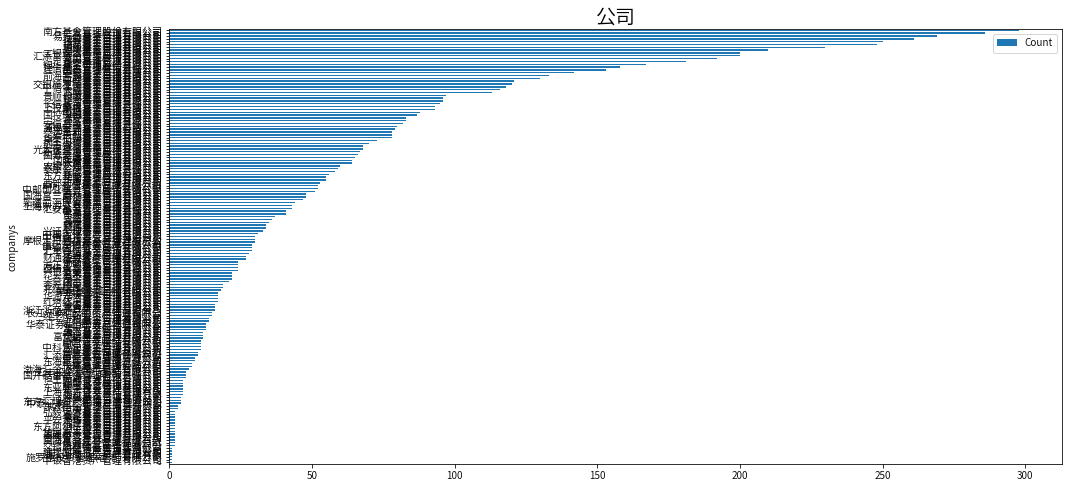

In [13]:
company = dfFunds.groupby('company').size().sort_values().reset_index(name = 'Count')
ax = company.plot(kind = 'barh', x = 'company')
ax.set_xlabel("")
ax.set_ylabel("companys")
ax.set_title("公司", fontsize=20)

Text(0.5, 1.0, 'type0')

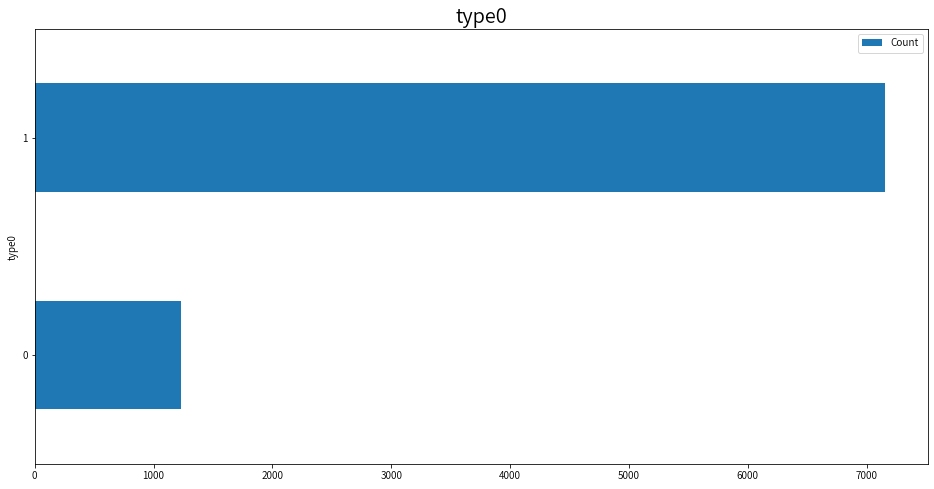

In [14]:
company = dfFunds.groupby('type0').size().sort_values().reset_index(name = 'Count')
ax = company.plot(kind = 'barh', x = 'type0')
ax.set_xlabel("")
ax.set_ylabel("type0")
ax.set_title("type0", fontsize=20)

In [15]:
dfFunds.groupby('type0').describe()

values                                                              \
           count       mean       std     min       25%       50%        75%   
type0                                                                          
0     1229.00000  472.42311 727.86853 0.00000   0.00000   0.00000 1019.00000   
1     7154.00000 1032.17613 833.31820 0.00000 435.00000 843.00000 1305.00000   

                      type1                                                  \
             max      count    mean     std     min     25%     50%     75%   
type0                                                                         
0     3824.00000 1229.00000 0.60049 0.49000 0.00000 0.00000 1.00000 1.00000   
1     4587.00000 7154.00000 0.37364 0.48380 0.00000 0.00000 0.00000 1.00000   

              createtimey                                            \
          max       count       mean      std        min        25%   
type0                                                                 
0     1.00000  1229.00000 2002.96827 18.95816 1970.00000 2004.00000   
1     1.00000  7154.00000 2015.01496  4.13949 1970.00000 2014.00000   

                                       createtimem                          \
             50%        75%        max       count    mean     std     min   
type0                                                                        
0     2014.00000 2015.00000 2019.00000  1229.00000 5.42148 3.89747 1.00000   
1     2016.00000 2018.00000 2019.00000  7154.00000 6.63377 3.49213 1.00000   

                                             size0                             \
          25%     50%      75%      max      count     mean       std     min   
type0                                                                           
0     1.00000 5.00000  9.00000 12.00000 1229.00000 41.49034 124.61414 0.00000   
1     4.00000 6.00000 10.00000 12.00000 7154.00000  7.55833  20.79672 0.00000   

                                          
          25%     50%      75%       max  
type0                                     
0     0.00000 0.12390 13.07380 979.63290  
1     0.23413 1.35830  5.65685 680.42390

In [16]:
dfFunds.groupby('type1').describe()

values                                                              \
           count       mean       std     min       25%       50%        75%   
type1                                                                          
0     4972.00000 1139.31154 846.69569 0.00000 552.00000 930.50000 1340.25000   
1     3411.00000  674.32982 755.29445 0.00000   1.00000 429.00000  952.50000   

                      type0                                                  \
             max      count    mean     std     min     25%     50%     75%   
type1                                                                         
0     4587.00000 4972.00000 0.90125 0.29836 0.00000 1.00000 1.00000 1.00000   
1     4384.00000 3411.00000 0.78364 0.41182 0.00000 1.00000 1.00000 1.00000   

              createtimey                                            \
          max       count       mean      std        min        25%   
type1                                                                 
0     1.00000  4972.00000 2012.17257 11.08374 1970.00000 2013.00000   
1     1.00000  3411.00000 2014.81765  5.17428 1970.00000 2013.00000   

                                       createtimem                          \
             50%        75%        max       count    mean     std     min   
type1                                                                        
0     2015.00000 2017.00000 2019.00000  4972.00000 6.19328 3.53780 1.00000   
1     2016.00000 2018.00000 2019.00000  3411.00000 6.83905 3.60696 1.00000   

                                             size0                            \
          25%     50%      75%      max      count     mean      std     min   
type1                                                                          
0     3.00000 6.00000  9.00000 12.00000 4972.00000  4.10003 12.22323 0.00000   
1     3.00000 7.00000 10.00000 12.00000 3411.00000 24.82514 79.88048 0.00000   

                                          
          25%     50%      75%       max  
type1                                     
0     0.13480 0.85030  3.17237 257.85060  
1     0.19610 2.88080 17.07825 979.63290

In [17]:
dfFunds.groupby('type2').describe()

values                                                        \
             count       mean       std        min        25%        50%   
type2                                                                      
           4.00000  754.50000 335.03681  583.00000  583.75000  589.00000   
ETF联接基金  241.00000  992.23237 755.73524    0.00000  437.00000  632.00000   
FOF      117.00000  709.88034 639.03081   85.00000  348.00000  430.00000   
债券型     2750.00000  836.41418 756.32055    0.00000  330.25000  564.00000   
其他         6.00000 1585.66667 163.63944 1416.00000 1435.25000 1581.00000   
混合型     3209.00000 1178.06482 909.74450    0.00000  586.00000  928.00000   
股票型     1395.00000 1110.77491 703.12851    0.00000  552.50000 1131.00000   
货币型      661.00000    0.00000   0.00000    0.00000    0.00000    0.00000   

                                   type0                                  \
               75%        max      count    mean     std     min     25%   
type2                                                                      
         759.75000 1257.00000    4.00000 1.00000 0.00000 1.00000 1.00000   
ETF联接基金 1324.00000 3674.00000  241.00000 1.00000 0.00000 1.00000 1.00000   
FOF      709.00000 2978.00000  117.00000 1.00000 0.00000 1.00000 1.00000   
债券型     1052.50000 4384.00000 2750.00000 0.97200 0.16500 0.00000 1.00000   
其他      1737.25000 1760.00000    6.00000 0.33333 0.51640 0.00000 0.00000   
混合型     1325.00000 4587.00000 3209.00000 0.97850 0.14507 0.00000 1.00000   
股票型     1408.00000 4339.00000 1395.00000 0.70036 0.45827 0.00000 0.00000   
货币型        0.00000    0.00000  661.00000 0.00000 0.00000 0.00000 0.00000   

                                     type1                                  \
            50%     75%     max      count    mean     std     min     25%   
type2                                                                        
        1.00000 1.00000 1.00000    4.00000 0.00000 0.00000 0.00000 0.00000   
ETF联接基金 1.00000 1.00000 1.00000  241.00000 0.00000 0.00000 0.00000 0.00000   
FOF     1.00000 1.00000 1.00000  117.00000 0.00000 0.00000 0.00000 0.00000   
债券型     1.00000 1.00000 1.00000 2750.00000 1.00000 0.00000 1.00000 1.00000   
其他      0.00000 0.75000 1.00000    6.00000 0.00000 0.00000 0.00000 0.00000   
混合型     1.00000 1.00000 1.00000 3209.00000 0.00000 0.00000 0.00000 0.00000   
股票型     1.00000 1.00000 1.00000 1395.00000 0.00000 0.00000 0.00000 0.00000   
货币型     0.00000 0.00000 0.00000  661.00000 1.00000 0.00000 1.00000 1.00000   

                                createtimey                                 \
            50%     75%     max       count       mean      std        min   
type2                                                                        
        0.00000 0.00000 0.00000     4.00000 2017.25000  1.50000 2015.00000   
ETF联接基金 0.00000 0.00000 0.00000   241.00000 2014.89212  3.49237 2005.00000   
FOF     0.00000 0.00000 0.00000   117.00000 2017.07692  2.85921 2007.00000   
债券型     1.00000 1.00000 1.00000  2750.00000 2015.17891  5.34370 1970.00000   
其他      0.00000 0.00000 0.00000     6.00000 1992.00000 24.09979 1970.00000   
混合型     0.00000 0.00000 0.00000  3209.00000 2013.80804  7.07437 1970.00000   
股票型     0.00000 0.00000 0.00000  1395.00000 2007.60143 16.90709 1970.00000   
货币型     1.00000 1.00000 1.00000   661.00000 2013.31467  4.07255 1970.00000   

                                                    createtimem          \
               25%        50%        75%        max       count    mean   
type2                                                                     
        2017.25000 2018.00000 2018.00000 2018.00000     4.00000 5.00000   
ETF联接基金 2012.00000 2015.00000 2018.00000 2019.00000   241.00000 6.13278   
FOF     2017.00000 2018.00000 2019.00000 2019.00000   117.00000 6.95726   
债券型     2013.00000 2016.00000 2018.00000 2019.00000  2750.00000 6.80364   
其他      1970.00000 1992.00000 2014.00000 2014.00000     6.00000 4.50000   
混合型     2014.00000 2

Text(0.5, 1.0, 'type1')

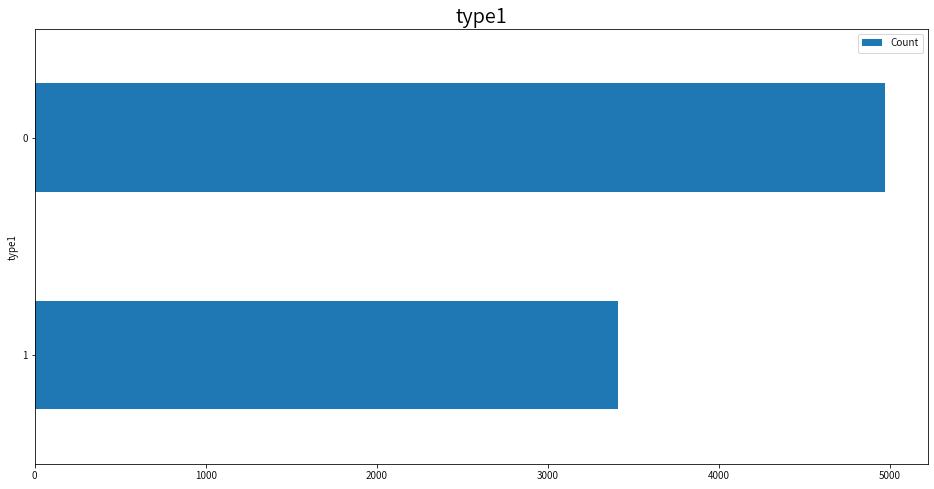

In [18]:
company = dfFunds.groupby('type1').size().sort_values().reset_index(name = 'Count')
ax = company.plot(kind = 'barh', x = 'type1')
ax.set_xlabel("")
ax.set_ylabel("type1")
ax.set_title("type1", fontsize=20)

Text(0.5, 1.0, 'type2')

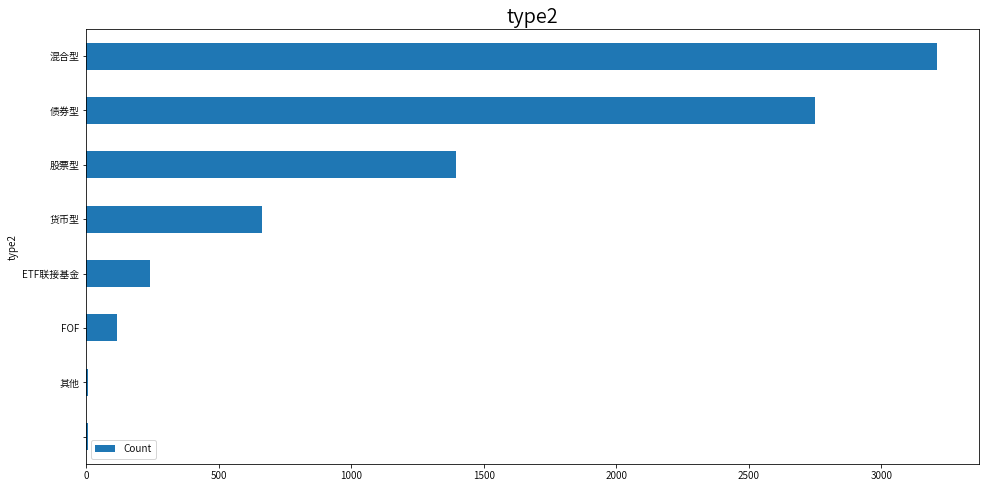

In [19]:
company = dfFunds.groupby('type2').size().sort_values().reset_index(name = 'Count')
ax = company.plot(kind = 'barh', x = 'type2')
ax.set_xlabel("")
ax.set_ylabel("type2")
ax.set_title("type2", fontsize=20)

Text(0.5, 1.0, 'createtimey')

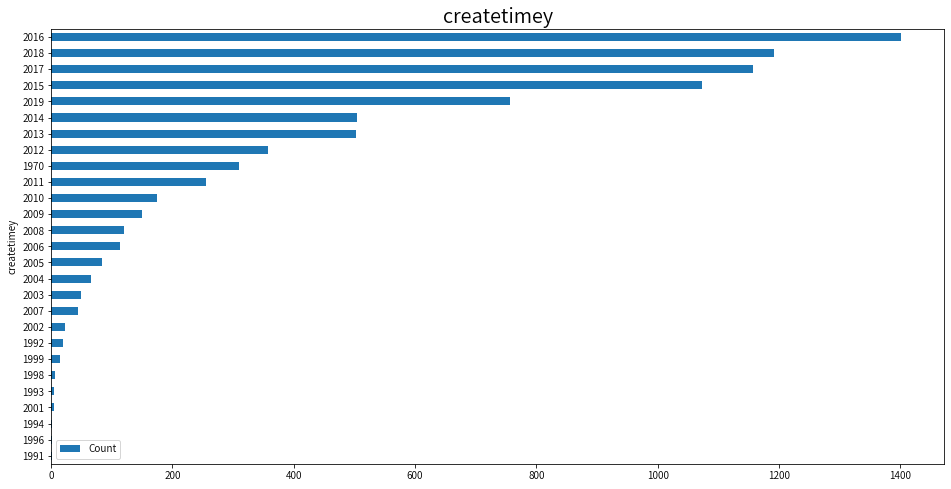

In [20]:
createtimey = dfFunds.groupby('createtimey').size().sort_values().reset_index(name = 'Count')
ax = createtimey.plot(kind = 'barh', x = 'createtimey')
ax.set_xlabel("")
ax.set_ylabel("createtimey")
ax.set_title("createtimey", fontsize=20)

Text(0.5, 1.0, 'createtimem')

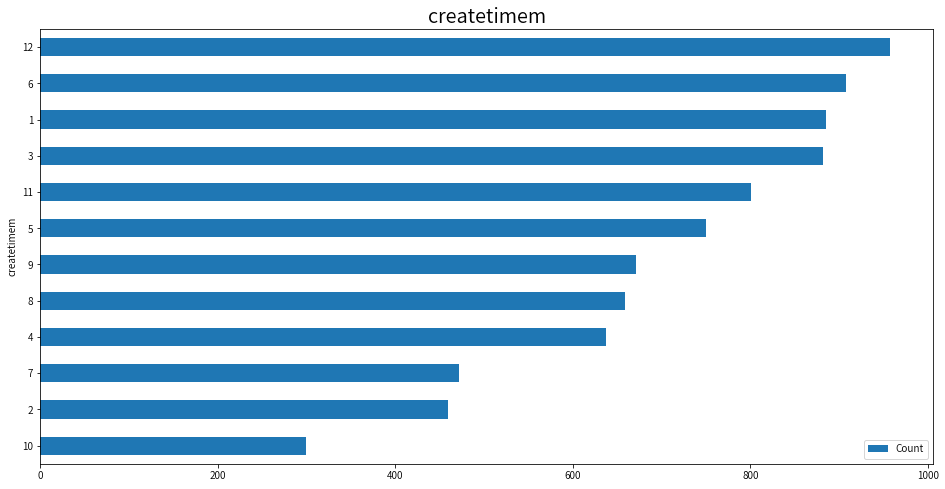

In [21]:
createtimem = dfFunds.groupby('createtimem').size().sort_values().reset_index(name = 'Count')
ax = createtimem.plot(kind = 'barh', x = 'createtimem')
ax.set_xlabel("")
ax.set_ylabel("createtimem")
ax.set_title("createtimem", fontsize=20)

In [22]:
dfType2 = dfFunds.groupby('type2').size().sort_values().reset_index(name = 'Count')
dfType2

,type2,Count
0,,4
1,其他,6
2,FOF,117
3,ETF联接基金,241
4,货币型,661
5,股票型,1395
6,债券型,2750
7,混合型,3209


Text(0.5, 1.0, 'type2')

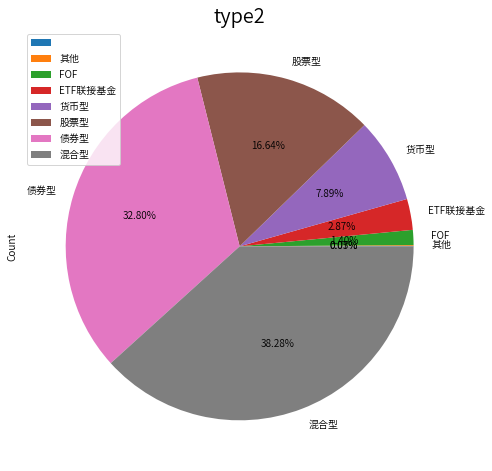

In [23]:
dfType2 = dfFunds.groupby('type2').size().sort_values().reset_index(name = 'Count')
ax = dfType2.plot(kind = 'pie', labels=dfType2['type2'], y='Count', autopct='%.2f%%')
ax.set_title("type2", fontsize=20)

Text(0.5, 1.0, 'size0')

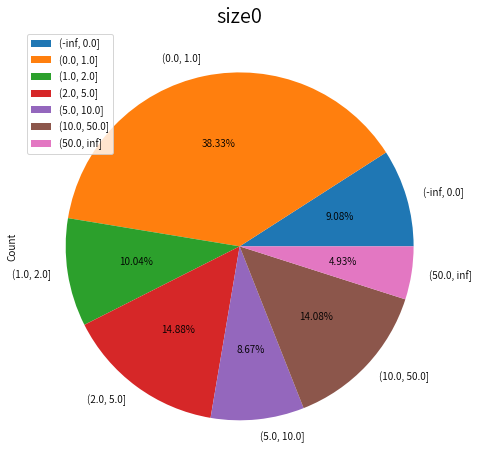

In [24]:
dtSize0 = dfFunds.groupby(size_groups).size().reset_index(name = 'Count')
ax = dtSize0.plot(kind = 'pie', labels=dtSize0['size0'], y='Count', autopct='%.2f%%')
ax.set_title("size0", fontsize=20)

In [25]:
dfFundResults

,code,nums,totalReturn,maxDrawDown,sharpe,annualizedReturns,annualizedVolatility,variance,perValidData,durationYear,maxupday,permaxupday,maxdownday,permaxdownday,maxupweek,permaxupweek,maxdownweek,permaxdownweek,maxupmonth,permaxupmonth,maxdownmonth,permaxdownmonth,maxupyear,permaxupyear,maxdownyear,permaxdownyear,tags,createtime
0,000001,4551,2.84700,0.29152,1.24044,0.15639,0.10189,0.93986,0.97410,12.80000,20050608,0.05589,20060607,-0.04362,20060508,0.07088,20060605,-0.05312,20060403,0.13135,20090803,-0.10379,20060104,0.91880,20080102,-0.22982,开放式;混合型 ;高风险,20011218
1,000003,1818,0.12790,0.56832,-0.06594,0.01759,0.18823,0.02811,0.93470,5.32877,20150601,0.09029,20150626,-0.11125,20200629,0.12907,20150623,-0.13103,20141201,0.17290,20150601,-0.26863,20140102,0.50426,20160104,-0.16735,开放式;债券型 ;低风险,20130320
2,000004,1818,0.12590,0.57032,-0.06730,0.01731,0.18850,0.02880,0.93470,5.32877,20150601,0.08984,20150626,-0.11174,20200629,0.13035,20150623,-0.13137,20141201,0.17681,20150601,-0.26687,20140102,0.50909,20160104,-0.17071,开放式;债券型 ;低风险,20130320
3,000005,1849,0.37000,0.03682,1.12122,0.05003,0.01786,0.01463,0.94481,5.36164,20150601,0.00797,20141209,-0.01310,20150518,0.01519,20150615,-0.01627,20150401,0.02750,20131101,-0.01201,20140102,0.08980,20130311,-0.01900,开放式;债券型 ;低风险,20130308
4,000006,377,0.81980,0.14627,2.30362,0.54363,0.22297,0.09003,0.84529,1.22192,20200204,0.04177,20200203,-0.08610,20200203,0.10265,20200224,-0.05718,20200701,0.15822,20200302,-0.09850,20190319,0.21200,20190319,0.21200,开放式;混合型 ;高风险,20190319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,968051,359,0.00000,0.00000,-inf,0.00000,0.00000,0.00000,0.82529,1.19178,20190401,0.00000,20190401,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,开放式;债券型 ;低风险,20190329
7418,968052,359,0.00000,0.00000,-inf,0.00000,0.00000,0.00000,0.82529,1.19178,20190401,0.00000,20190401,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,开放式;债券型 ;低风险,20190329
7419,968053,359,0.00000,0.00000,-inf,0.00000,0.00000,0.00000,0.82529,1.19178,20190401,0.00000,20190401,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,开放式;债券型 ;低风险,20190329
7420,968054,359,0.00000,0.00000,-inf,0.00000,0.00000,0.00000,0.82529,1.19178,20190401,0.00000,20190401,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,开放式;债券型 ;低风险,20190329


In [26]:
dfFundResults.describe()

,nums,totalReturn,maxDrawDown,sharpe,annualizedReturns,annualizedVolatility,variance,perValidData,durationYear,maxupday,permaxupday,maxdownday,permaxdownday,maxupweek,permaxupweek,maxdownweek,permaxdownweek,maxupmonth,permaxupmonth,maxdownmonth,permaxdownmonth,maxupyear,permaxupyear,maxdownyear,permaxdownyear,createtime
count,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7407.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000,7422.00000
mean,1073.13339,0.57427,0.19377,-inf,0.14876,0.13222,0.11337,inf,4.68849,20178649.99111,-2020.95731,20180876.95365,2020.96732,20180919.94287,-2020.94553,20179287.82538,2020.95936,20181033.73673,-2559.83521,20179620.39598,2559.87379,20175752.86621,-9970.06797,20170330.66370,9970.27018,20135650.49650
std,818.08100,1.10671,0.19053,nan,0.52468,0.12462,3.12329,nan,6.23206,30064.49302,44913.27276,28746.48563,44913.27231,29509.06260,44913.27329,25659.89248,44913.27266,29479.56468,50534.57318,27882.73556,50534.57122,27347.59104,99359.27905,25382.27555,99359.25876,89958.74132
min,1.00000,-0.98410,0.00000,-inf,-0.47462,0.00000,0.00000,0.00136,0.00000,20040105.00000,-999999.00000,20030424.00000,-0.89838,20040913.00000,-999999.00000,20040412.00000,-0.89885,20040102.00000,-999999.00000,20040401.00000,-0.82068,20060104.00000,-999999.00000,20040102.00000,-0.89400,19700101.00000
25%,461.00000,0.11829,0.03188,0.27274,0.04234,0.02743,0.00300,0.79568,1.91233,20151210.25000,0.01024,20160107.00000,-0.07543,20170418.75000,0.01057,20160304.00000,-0.08855,20161133.50000,0.02185,20160104.00000,-0.11921,20170217.50000,0.06511,20170103.00000,-0.19550,20131049.50000
50%,886.50000,0.32080,0.13687,0.86543,0.08770,0.11782,0.01388,0.92294,2.95069,20190304.00000,0.04020,20200203.00000,-0.04932,20200203.00000,0.05772,20181008.00000,-0.04745,20200153.00000,0.09335,20191101.00000,-0.06124,20190102.00000,0.16851,20180102.00000,-0.02109,20160713.00000
75%,1326.00000,0.70060,0.30287,1.53803,0.19368,0.21566,0.05149,0.95902,4.78356,20200325.00000,0.05851,20200313.00000,-0.01030,20200323.00000,0.09030,20200601.00000,-0.01073,20200601.00000,0.16013,20200302.00000,-0.01296,20190102.00000,0.41040,20180823.75000,0.01105,20180124.00000
max,4587.00000,58.17080,0.99478,16.59401,42.52251,3.29168,265.81961,inf,34.99452,20200929.00000,45.52053,20200925.00000,999999.00000,20200921.00000,46.33188,20200921.00000,999999.00000,20200909.00000,44.68437,20200909.00000,999999.00000,20200909.00000,50.12250,20200909.00000,999999.00000,20190909.00000


In [27]:
dfFundResults2 = cnfundutils.mergeFundResultAndBasic(dfFundResults, dfFunds)

In [28]:
dfFundResults2

,code,nums,totalReturn,maxDrawDown,sharpe,annualizedReturns,annualizedVolatility,variance,perValidData,durationYear,maxupday,permaxupday,maxdownday,permaxdownday,maxupweek,permaxupweek,maxdownweek,permaxdownweek,maxupmonth,permaxupmonth,maxdownmonth,permaxdownmonth,maxupyear,permaxupyear,maxdownyear,permaxdownyear,name,tags,createtime,size,company,managers,values,type0,type1,type2,createtimey,createtimem,size0
0,000001,4551,2.84700,0.29152,1.24044,0.15639,0.10189,0.93986,0.97410,12.80000,20050608,0.05589,20060607,-0.04362,20060508,0.07088,20060605,-0.05312,20060403,0.13135,20090803,-0.10379,20060104,0.91880,20080102,-0.22982,华夏成长混合,开放式; 混合型 ; 高风险,2001-12-18,"[{""size"":38.8478,""time"":1601716484}]",华夏基金管理有限公司,"[{""name"":""王亚伟"",""startTime"":1008633600,""endTime...",4551,1,0,混合型,2001,12,38.84780
1,000003,1818,0.12790,0.56832,-0.06594,0.01759,0.18823,0.02811,0.93470,5.32877,20150601,0.09029,20150626,-0.11125,20200629,0.12907,20150623,-0.13103,20141201,0.17290,20150601,-0.26863,20140102,0.50426,20160104,-0.16735,中海可转债债券A,开放式; 债券型 ; 低风险,2013-03-20,"[{""size"":0.667,""time"":1601716483}]",中海基金管理有限公司,"[{""name"":""周其源"",""startTime"":1363737600,""endTime...",1818,1,1,债券型,2013,3,0.66700
2,000004,1818,0.12590,0.57032,-0.06730,0.01731,0.18850,0.02880,0.93470,5.32877,20150601,0.08984,20150626,-0.11174,20200629,0.13035,20150623,-0.13137,20141201,0.17681,20150601,-0.26687,20140102,0.50909,20160104,-0.17071,中海可转债债券C,开放式; 债券型 ; 低风险,2013-03-20,"[{""size"":0.5437,""time"":1601716489}]",中海基金管理有限公司,"[{""name"":""周其源"",""startTime"":1363737600,""endTime...",1818,1,1,债券型,2013,3,0.54370
3,000005,1849,0.37000,0.03682,1.12122,0.05003,0.01786,0.01463,0.94481,5.36164,20150601,0.00797,20141209,-0.01310,20150518,0.01519,20150615,-0.01627,20150401,0.02750,20131101,-0.01201,20140102,0.08980,20130311,-0.01900,嘉实增强信用定期债券,开放式; 债券型 ; 低风险,2013-03-08,"[{""size"":0.5634,""time"":1601716568}]",嘉实基金管理有限公司,"[{""name"":""刘宁"",""startTime"":1362700800,""educatio...",1849,1,1,债券型,2013,3,0.56340
4,000006,377,0.81980,0.14627,2.30362,0.54363,0.22297,0.09003,0.84529,1.22192,20200204,0.04177,20200203,-0.08610,20200203,0.10265,20200224,-0.05718,20200701,0.15822,20200302,-0.09850,20190319,0.21200,20190319,0.21200,西部利得量化成长混合,开放式; 混合型 ; 高风险,2019-03-19,"[{""size"":2.5372,""time"":1601716483}]",西部利得基金管理有限公司,"[{""name"":""盛丰衍"",""startTime"":1552953600,""sex"":tr...",377,1,0,混合型,2019,3,2.53720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,968051,359,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.82529,1.19178,20190401,0.00000,20190401,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,摩根国际债券人民币对冲派息,开放式; 债券型 ; 低风险,2019-03-29,"[{""time"":1601730313}]",摩根基金(亚洲)有限公司,[{}],359,1,1,债券型,2019,3,0.00000
7418,968052,359,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.82529,1.19178,20190401,0.00000,20190401,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,摩根国际债券人民币累计,开放式; 债券型 ; 低风险,2019-03-29,"[{""time"":1601730311}]",摩根基金(亚洲)有限公司,[{}],359,1,1,债券型,2019,3,0.00000
7419,968053,359,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.82529,1.19178,20190401,0.00000,20190401,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,摩根国际债券人民币派息,开放式; 债券型 ; 低风险,2019-03-29,"[{""time"":1601730317}]",摩根基金(亚洲)有限公司,[{}],359,1,1,债券型,2019,3,0.00000
7420,968054,359,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.82529,1.19178,20190401,0.00000,20190401,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,20190329,0.00000,摩根国际债券美元累计,开放式; 债券型 ; 低风险,2019-03-29,"[{""time"":1601730321}]",摩根基金(亚洲)有限公司,[{}],359,1,1,债券型,2019,3,0.00000


Text(0.5, 1.0, 'annualizedReturns')

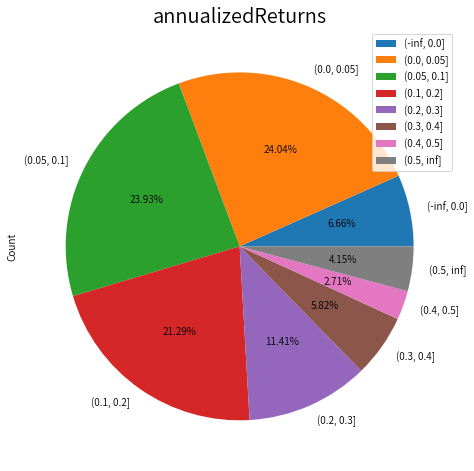

In [29]:
ar_groups = pd.cut(dfFundResults2['annualizedReturns'], bins=[-np.inf,0,0.05,0.1,0.2,0.3,0.4,0.5,np.inf])
dtAR2 = dfFundResults2.groupby(ar_groups).size().reset_index(name = 'Count')
ax = dtAR2.plot(kind = 'pie', labels=dtAR2['annualizedReturns'], y='Count', autopct='%.2f%%')
ax.set_title("annualizedReturns", fontsize=20)

Text(0.5, 1.0, 'annualizedReturns')

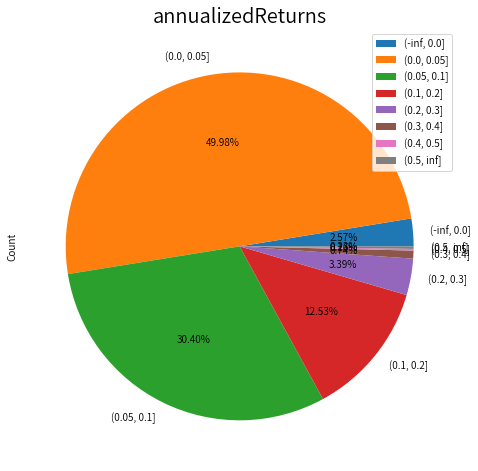

In [30]:
dffrzq = dfFundResults2.where(dfFundResults2.type2 == '债券型')
ar_groups = pd.cut(dffrzq['annualizedReturns'], bins=[-np.inf,0,0.05,0.1,0.2,0.3,0.4,0.5,np.inf])
dtAR2 = dffrzq.groupby(ar_groups).size().reset_index(name = 'Count')
ax = dtAR2.plot(kind = 'pie', labels=dtAR2['annualizedReturns'], y='Count', autopct='%.2f%%')
ax.set_title("annualizedReturns", fontsize=20)

In [31]:
dfFundResults2020c = cnfundutils.mergeFundResultAndBasic(dfFundResults2020, dfFunds)

In [32]:
dfFundResults2020

,code,nums,totalReturn,maxDrawDown,sharpe,annualizedReturns,annualizedVolatility,variance,perValidData,durationYear,maxupday,permaxupday,maxdownday,permaxdownday,maxupweek,permaxupweek,maxdownweek,permaxdownweek,maxupmonth,permaxupmonth,maxdownmonth,permaxdownmonth,maxupyear,permaxupyear,maxdownyear,permaxdownyear,tags
0,000001,183,0.07338,0.04831,0.89850,0.10025,0.07818,0.00129,0.03917,12.80000,20200713,0.01004,20200203,-0.02144,20200706,0.02102,20200224,-0.02027,20200701,0.04059,20200302,-0.02848,20200102,-999999.00000,20200102,999999.00000,开放式;混合型 ;高风险
1,000003,183,0.09399,0.12211,0.45919,0.12840,0.21428,0.00495,0.09409,5.32877,20200706,0.05941,20200203,-0.06664,20200629,0.12907,20200713,-0.06176,20200701,0.12672,20200302,-0.05449,20200102,-999999.00000,20200102,999999.00000,开放式;债券型 ;低风险
2,000004,183,0.09099,0.12303,0.44019,0.12430,0.21423,0.00487,0.09409,5.32877,20200706,0.05946,20200203,-0.06664,20200629,0.13035,20200713,-0.06266,20200701,0.12597,20200302,-0.05359,20200102,-999999.00000,20200102,999999.00000,开放式;债券型 ;低风险
3,000005,183,0.01256,0.01933,-0.74103,0.01716,0.01732,0.00005,0.09351,5.36164,20200407,0.00647,20200605,-0.00225,20200420,0.00512,20200601,-0.00720,20200401,0.01600,20200601,-0.00720,20200102,-999999.00000,20200102,999999.00000,开放式;债券型 ;低风险
4,000006,183,0.47328,0.14627,2.20895,0.64656,0.27912,0.03911,0.41031,1.22192,20200204,0.04177,20200203,-0.08610,20200203,0.10265,20200224,-0.05718,20200701,0.15822,20200302,-0.09850,20200102,-999999.00000,20200102,999999.00000,开放式;混合型 ;高风险
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,968051,178,0.00000,0.00000,-inf,0.00000,0.00000,0.00000,0.40919,1.19178,20200103,0.00000,20200103,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,-999999.00000,20200102,999999.00000,开放式;债券型 ;低风险
7272,968052,178,0.00000,0.00000,-inf,0.00000,0.00000,0.00000,0.40919,1.19178,20200103,0.00000,20200103,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,-999999.00000,20200102,999999.00000,开放式;债券型 ;低风险
7273,968053,178,0.00000,0.00000,-inf,0.00000,0.00000,0.00000,0.40919,1.19178,20200103,0.00000,20200103,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,-999999.00000,20200102,999999.00000,开放式;债券型 ;低风险
7274,968054,178,0.00000,0.00000,-inf,0.00000,0.00000,0.00000,0.40919,1.19178,20200103,0.00000,20200103,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,0.00000,20200102,-999999.00000,20200102,999999.00000,开放式;债券型 ;低风险


In [33]:
dfFundResults2020c.sort_values(by='totalReturn')

,code,nums,totalReturn,maxDrawDown,sharpe,annualizedReturns,annualizedVolatility,variance,perValidData,durationYear,maxupday,permaxupday,maxdownday,permaxdownday,maxupweek,permaxupweek,maxdownweek,permaxdownweek,maxupmonth,permaxupmonth,maxdownmonth,permaxdownmonth,maxupyear,permaxupyear,maxdownyear,permaxdownyear,name,tags,createtime,size,company,managers,values,type0,type1,type2,createtimey,createtimem,size0
5509,150310,183,-0.80787,0.82068,-0.57100,-1.10364,1.98537,0.13482,0.13586,3.69041,20200706,0.04386,20200327,-0.81354,20200706,0.09244,20200323,-0.81354,20200701,0.08182,20200302,-0.82068,20200102,-999999.00000,20200102,999999.00000,信诚信息安全B,封闭式; 股票型 ; 高风险,2015-06-26,NaN,中信保诚基金管理有限公司,"[{""name"":""杨旭"",""startTime"":1435276800,""sex"":tru...",1284,0,0,股票型,2015,6,0.00000
5511,150312,183,-0.77857,0.80810,-0.57582,-1.06363,1.89924,0.12792,0.13586,3.69041,20200601,0.04124,20200327,-0.79966,20200706,0.06195,20200323,-0.79966,20200701,0.06542,20200302,-0.80810,20200102,-999999.00000,20200102,999999.00000,信诚智能家居B,封闭式; 股票型 ; 高风险,2015-06-26,NaN,中信保诚基金管理有限公司,"[{""name"":""杨旭"",""startTime"":1435276800,""sex"":tru...",1284,0,0,股票型,2015,6,0.00000
5612,160216,182,-0.62076,0.71124,-1.49350,-0.85269,0.59102,0.04358,0.08469,5.88767,20200403,0.11894,20200309,-0.20321,20200330,0.26368,20200420,-0.17188,20200506,0.13939,20200302,-0.48985,20200102,-999999.00000,20200102,999999.00000,国泰大宗商品(QDII-LOF),开放式; FOF ; 高风险,2012-05-03,"[{""size"":16.3527,""time"":1601727431}]",国泰基金管理有限公司,"[{""name"":""崔涛"",""startTime"":1336003200,""endTime""...",1985,1,0,FOF,2012,5,16.35270
2163,003321,182,-0.57602,0.72937,-1.46878,-0.79123,0.55912,0.03846,0.19804,2.51781,20200402,0.11376,20200309,-0.18126,20200330,0.21434,20200420,-0.23221,20200506,0.22211,20200302,-0.46052,20200102,-999999.00000,20200102,999999.00000,易原油(QDII-FOF)C类人民币,开放式; FOF ; 高风险,2016-12-19,"[{""size"":5.1381,""time"":1601720738}]",易方达基金管理有限公司,"[{},{""name"":""张胜记"",""startTime"":1482105600,""endT...",868,1,0,FOF,2016,12,5.13810
5748,161129,182,-0.57077,0.72633,-1.46214,-0.78403,0.55674,0.03844,0.19804,2.51781,20200402,0.11370,20200309,-0.18123,20200330,0.21429,20200420,-0.23228,20200506,0.22214,20200302,-0.46037,20200102,-999999.00000,20200102,999999.00000,易原油(QDII-FOF-LOF)A类人民币,开放式; FOF ; 高风险,2016-12-19,"[{""size"":9.9173,""time"":1601727525}]",易方达基金管理有限公司,[{}],868,1,0,FOF,2016,12,9.91730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,150262,183,0.93421,0.25000,2.88635,1.27624,0.43177,0.11370,0.13232,3.78904,20200325,0.07457,20200316,-0.07867,20200203,0.16109,20200309,-0.09779,20200203,0.23222,20200302,-0.11327,20200102,-999999.00000,20200102,999999.00000,华宝医疗B,封闭式; 股票型 ; 高风险,2015-05-21,NaN,华宝基金管理有限公司,"[{""name"":""胡洁"",""startTime"":1432166400,""educatio...",1313,0,0,股票型,2015,5,0.00000
5505,150304,183,0.97744,0.36649,2.12352,1.33530,0.61469,0.18412,0.13687,3.66301,20200204,0.09231,20200316,-0.12903,20200203,0.20769,20200224,-0.14894,20200701,0.32143,20200302,-0.25882,20200102,-999999.00000,20200102,999999.00000,华安创业板50B,封闭式; 股票型 ; 高风险,2015-07-06,NaN,华安基金管理有限公司,"[{""name"":""许之彦"",""startTime"":1436140800,""sex"":tr...",1280,0,0,股票型,2015,7,0.00000
5366,150050,183,1.03075,0.24964,3.01446,1.40812,0.45717,0.20464,0.08314,6.03014,20200324,0.07805,20200203,-0.13157,20200323,0.13564,20200120,-0.08640,20200701,0.26219,20200102,-0.06331,20200102,-999999.00000,20200102,999999.00000,南方消费进取,封闭式; 股票型 ; 高风险,2012-03-13,NaN,南方基金管理股份有限公司,"[{},{""name"":""杜冬松"",""startTime"":1331596800,""endT...",2071,0,0,股票型,2012,3,0.00000
5439,150220,183,1.27615,0.24561,3.94554,1.74338,0.43426,0.24096,0.12906,3.88493,20200325,0.07463,20200203,-0.09160,20200323,0.17565,20200309,-0.10040,20200701,0.22606,20200803,0.01588,20200102,-999999.00000,20200102,999999.00000,前海开源健康分级B,封闭式; 股票型 ; 高风险,2015-04-16,NaN,前海开源基金管理有限公司,"[{""name"":""孙亚超"",""startTime"":1429142400,""endTime...",1329,0,0,股票型,2015,4,0.00000
